<img src="https://github.com/Mr-ZOBA/A-obi/blob/main/docux.jpg?raw=true" width="900" height="50"/>

<font size="5" face="Helvetica"> L'objectif est de determiner si oui ou non un prêt banquaire sera accorde à un client ou non en fonction de certaines critère. Cet travail nous permettra d'ameliorer nos compétences en ce qui concerne les techniques de classification et nous permettra d'appliquer les technique ensemble modèle comme le Bagging, le Adaboosting, Le gradient Boosting, le XGBoosting(xtrem gradient boosting) et le random Forest (forêt alléatoires)</font> 

In [221]:
# Chargeons les packages necessaires. nous pourrions le faire en deux lignes avec le package ppyforest et llazy_imports(). 
# Nous allons y aller manuellement pour plus de details
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from os import system
from sklearn import tree

In [120]:
# importons la base de données 
data = pd.read_csv('credit.csv')
data.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [121]:
# Affichons le nombre de ligne et de colonnes (nb lignes, nb colonne) 
data.shape

(1000, 17)

In [122]:
# Affichons les types de variables dont on dispose 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

Il n'y a pas de valeur null cependant on remarque des variables de types object. On doit donc les recoder

In [123]:
# Transformons les variables types object en variables categoriels 
for k in data.columns:
    if data[k].dtype=='object': ## si le type de la variables est object
        data[k]=pd.Categorical(data[k]) ## recode la variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [124]:
# Nous allons affichers les modalités de chaque variables. Pour cela nous allons utilise une boucle 
for j in data.columns: 
    if data[j].dtype == 'category': 
      print(f'\n ************ {data[j].value_counts()} \n') 


 ************ checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64 


 ************ credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64 


 ************ purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64 


 ************ savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64 


 ************ employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: count, dtype: int64 


 ************ other_credit
none     814
bank     139
store     47
Name: count, dtype: int64 


 ************ housing
own      713
rent     179
other    108
Name: count, dtype: int64 


In [164]:
# Nous allons créer un dictionnaire avec les variables recodées 
dit={
    "checking_balance": {"< 0 DM": 1, "1 - 200 DM": 2, "> 200 DM": 3, "unknown": -1},
    "credit_history": {"critical": 1, "poor": 2, "good": 3, "very good": 4, "perfect": 5},
    "savings_balance": {"< 100 DM": 1, "100 - 500 DM": 2, "500 - 1000 DM": 3, "> 1000 DM": 4, "unknown": -1},
    "employment_duration": {"unemployed": 1, "< 1 year": 2, "1 - 4 years": 3, "4 - 7 years": 4, "> 7 years": 5},
    "phone": {"no": 1, "yes": 2},
    "default": {"no": 1, "yes": 2}
}

# nous allons aussi definir des variables qui selon moi ne sont pas ordinal. Elle nous servira à créer 
# de nouvelle variables 
var = ["purpose","other_credit","housing","job"]

In [165]:
BD = data.replace(dit)
data1 = pd.get_dummies(BD, columns=var, dtype=int)
data1.head(5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16432\3566945131.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BD = data.replace(dit)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16432\3566945131.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  BD = data.replace(dit)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16432\3566945131.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beh

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,0,1,0,1,0,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,0,1,0,1,0,0,0,1,0,0


In [166]:
for d in ["checking_balance","credit_history","savings_balance","employment_duration","phone","default" ]: 
    data1[d]=data1[d].astype(int)

In [167]:
# identifions les variables explicatives et les variables expliquées 
X=data1.drop("default", axis=1) # les données de la base sauf celle de default
Y=data1.pop("default") # extrait de la base la colonne default
X.head(3)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1


In [177]:
# preparons le model en repartissant la base de données en 4 parties x_train, y_train, x_test, y_test
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1)

### Modèle abre de decision (decision tree)

In [178]:
reg_model = DecisionTreeClassifier(criterion='gini')
reg_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [182]:
# Affichons les scores qui permet d'afficher la qualité du model 
print(f'Le score est {reg_model.score(x_train,y_train)*100}%')

Le score est 100.0%


In [181]:
# Faisons la même chose sur les données test 
print(f'Le score est {reg_model.score(x_test,y_test)*100}%')

Le score est 67.0%


In [223]:
print(pd.DataFrame(reg_model.feature_importances_, columns = ["Importance"], index = x_train.columns))

                              Importance
checking_balance                0.141887
months_loan_duration            0.098963
credit_history                  0.069107
amount                          0.203606
savings_balance                 0.037829
employment_duration             0.063591
percent_of_income               0.027486
years_at_residence              0.053189
age                             0.107602
existing_loans_count            0.014921
dependents                      0.010629
phone                           0.014894
purpose_business                0.026477
purpose_car                     0.017627
purpose_car0                    0.000000
purpose_education               0.006282
purpose_furniture/appliances    0.017469
purpose_renovations             0.004489
other_credit_bank               0.000000
other_credit_none               0.013400
other_credit_store              0.005983
housing_other                   0.011694
housing_own                     0.018713
housing_rent    

In [224]:
reg_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
reg_model.fit(x_train, y_train)
print(reg_model.score(x_train, y_train)) 
print(reg_model.score(x_test, y_test))

0.7528571428571429
0.7433333333333333


#### En terme d'importance , les variables qui influencent le plus la decision que le prêt soit accorde ou non sont par ordre d'importance: 
amount, checking_balance, age, credit_history, employment_duration, etc...

0.7433333333333333


<IPython.core.display.Javascript object>

<Axes: >

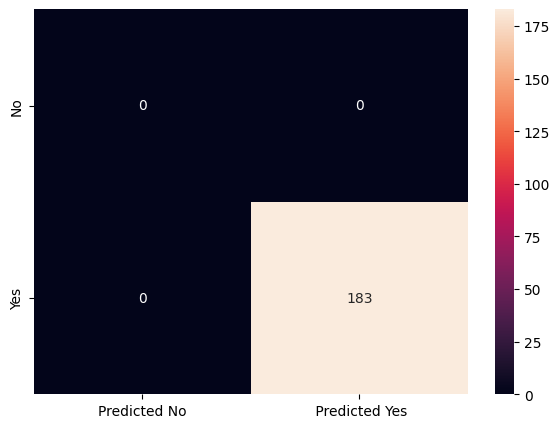

In [225]:
print(reg_model.score(x_test , y_test))
y_predict = reg_model.predict(x_test)
conf=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
TrConf = pd.DataFrame(conf, index = [i for i in ["No","Yes"]],columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(TrConf, annot=True ,fmt='g')

## Bagging pour eviter les erreur d'estimations

0.7333333333333333


<IPython.core.display.Javascript object>

<Axes: >

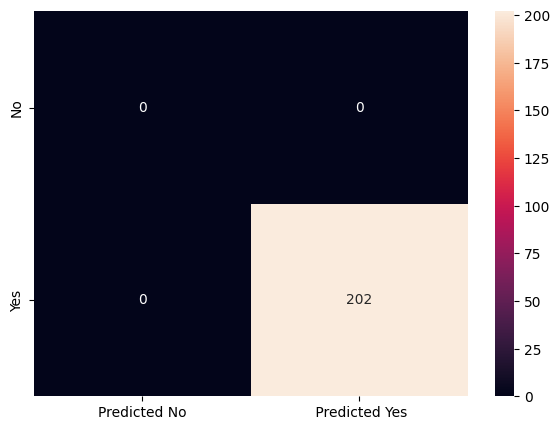

In [226]:
bagging_model = BaggingClassifier(reg_model, n_estimators=50, random_state=1)
bagging_model = bagging_model.fit(x_train, y_train)
y_predict = bagging_model.predict(x_test)
print(bagging_model.score(x_test , y_test))

conf=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
Bagg = pd.DataFrame(conf, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(Bagg, annot=True ,fmt='g')

## Ensemble Learning - AdaBoosting

In [211]:
reg_ada = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
reg_ada = reg_ada.fit(x_train, y_train)

0.72


<IPython.core.display.Javascript object>

<Axes: >

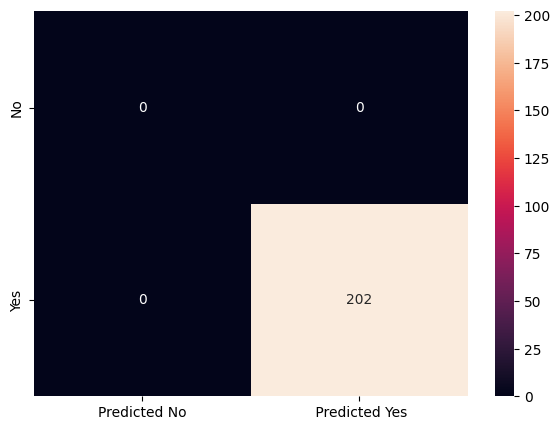

In [227]:
y_predict = reg_ada.predict(x_test)
print(reg_ada.score(x_test , y_test))

conf=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

ada = pd.DataFrame(conf, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(ada, annot=True ,fmt='g')

## Gradient Boosting

0.74


<IPython.core.display.Javascript object>

<Axes: >

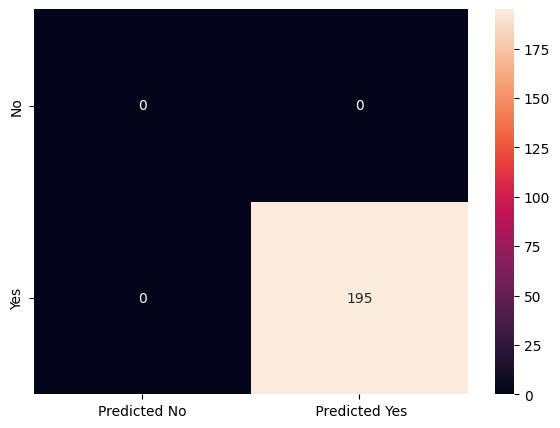

In [228]:
reg_gb = GradientBoostingClassifier(n_estimators = 50,random_state=1)
reg_gb = reg_gb.fit(x_train, y_train) 

y_predict = reg_gb.predict(x_test)
print(reg_gb.score(x_test, y_test))
conf=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

gb = pd.DataFrame(conf, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(gb, annot=True ,fmt='g')

## Ensemble RandomForest Classifier

In [219]:
rdlForest = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rdlForest = rdlForest.fit(x_train, y_train)

0.77


<IPython.core.display.Javascript object>

<Axes: >

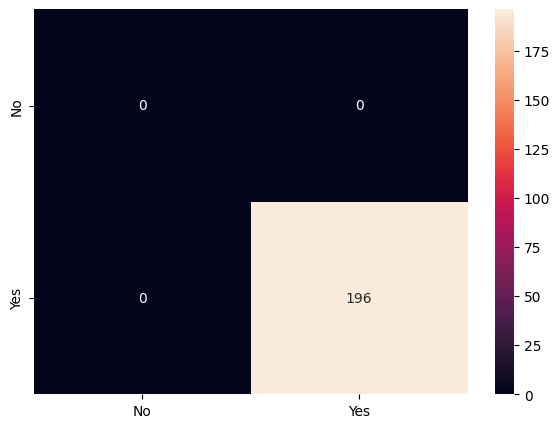

In [220]:
y_predict = rdlForest.predict(x_test)
print(rdlForest.score(x_test, y_test))
conf=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

RF = pd.DataFrame(conf, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(RF, annot=True ,fmt='g')